In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
data = pd.read_csv(r'C:\Users\Maxime.ALTER\ProjetFinal\data\kmean_Data.csv')\
.set_index("customer_unique_id")

In [5]:
print(data.shape)

(92753, 7)


In [6]:
data

,total_spend,review_id,mean_review,total_nb_sellers,erreur_estimation_livraison,temps_commande_livraison,buy_freq
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,5.0,1,99.189722,153.869444,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,4.0,1,101.955000,78.854167,0.0
0000f46a3911fa3c0805444483337064,69.00,1,3.0,1,33.353611,617.562222,0.0
0000f6ccb0745a6a4b88665a16c9f078,25.99,1,4.0,1,266.615278,480.890000,0.0
0004aac84e0df4da2b147fca70cf8255,180.00,1,5.0,1,168.851111,315.387222,0.0
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1,5.0,1,638.633333,660.356667,0.0
fffea47cd6d3cc0a88bd621562a9d061,64.89,1,4.0,1,49.527778,722.340000,0.0
ffff371b4d645b6ecea244b27531430a,89.90,1,5.0,1,707.248889,356.930000,0.0


In [15]:
#centrage réduction des données

data_cr = preprocessing.scale(data)
print(data_cr.shape)

(92753, 7)


In [18]:
#générer la matrice des liens
matrice = linkage(data_cr,method='ward',metric='euclidean')

MemoryError: Unable to allocate 32.0 GiB for an array with shape (4301513128,) and data type float64

NameError: name 'matrice' is not defined

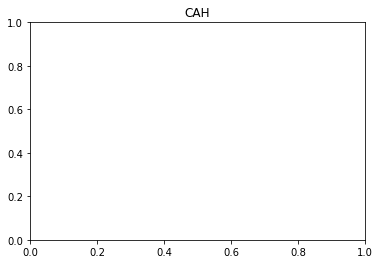

In [17]:
plt.title("CAH")
dendrogram(matrice,labels=data.index,orientation='left',color_threshold=0)
plt.show()

In [ ]:
#matérialisation des 4 classes (hauteur t = 7)
#On choisi un niveau égale à 7 pour découper l'arbre 
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(matrice,labels=data.index,orientation='left',color_threshold=7)
plt.show()